<a href="https://colab.research.google.com/github/ams015/visualization_challenge/blob/master/Visualization_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyitlib

In [2]:
!pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python2.7/dist-packages (0.10.0)


# **Loading and viewing the data**

In [0]:
import pandas as pd
import scipy.stats as ss
from pyitlib import discrete_random_variable as drv
import collections
from sklearn import decomposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from kmodes.kprototypes import KPrototypes


In [0]:
url = 'https://raw.githubusercontent.com/ams015/challenge2/master/Aman_tblCancellations.csv?token=AKH05peeGKB69-Q53Gq-Y4bEDESTBv7oks5cuO_iwA%3D%3D'

df1 = pd.read_csv(url)

# Dataset is now stored in a Pandas Dataframe

In [14]:
df2

,Cname,Clocation,Ind,Dept,Desig,Group,Start_Date,End_Date
0,American Electric Power,Ohio,Engineering,Operations,Associate,4,2002,2004
1,American Electric Power,Ohio,Container,Technology,Acting,0,2012,2013
3,Cardinal Health,Ohio,Engineering,Engineering,Junior,0,2002,2016
4,Cardinal Health,Ohio,Advertising,Finance,Associate,3,1994,1998
5,Cardinal Health,Ohio,Industrial Specialties,Technology,Interim,0,1990,1996
6,Cardinal Health,Ohio,Industrial Specialties,Technology,Interim,1,1999,2006
7,Cardinal Health,Ohio,Universities,Engineering,Interim,0,1993,1997
11,Caterpillar,Georgia,Specialty Chemicals,Performance Management,Associate,1,1999,2006
12,Caterpillar,Georgia,Industrial Specialties,Performance Management,Associate,1,2002,2016
13,Caterpillar,Georgia,Specialty Chemicals,Performance Management,Associate,0,2006,2007


In [5]:

name= df1.columns.values
name

array(['Cname', 'Clocation', 'Ind', 'Dept', 'Desig', 'Group',
       'Start_Date', 'End_Date'], dtype=object)

In [0]:
#this one adds the column 'length',which specifies the length in years of the customer using the order
dftest2=df1.copy()

dftest2['length'] = dftest2.apply(lambda row: -row.Start_Date+row.End_Date, axis=1)

In [7]:
dftest2

,Cname,Clocation,Ind,Dept,Desig,Group,Start_Date,End_Date,length
0,American Electric Power,Ohio,Engineering,Operations,Associate,4,2002,2004,2
1,American Electric Power,Ohio,Container,Technology,Acting,0,2012,2013,1
2,Boston Scientific,Minnesota,Specialty Chemicals,NaN,Senior Staff,4,2013,2015,2
3,Cardinal Health,Ohio,Engineering,Engineering,Junior,0,2002,2016,14
4,Cardinal Health,Ohio,Advertising,Finance,Associate,3,1994,1998,4
5,Cardinal Health,Ohio,Industrial Specialties,Technology,Interim,0,1990,1996,6
6,Cardinal Health,Ohio,Industrial Specialties,Technology,Interim,1,1999,2006,7
7,Cardinal Health,Ohio,Universities,Engineering,Interim,0,1993,1997,4
8,Caterpillar,Georgia,Logistics,Communications,NaN,1,1992,2010,18
9,Caterpillar,Georgia,Industrial Specialties,Customer Service,NaN,1,1998,2006,8


In [8]:
print df1.size

456


This is the data with the missing values dropped

In [0]:
df2=df1.dropna(axis=0)

In [10]:
print df2.size-df1.size

-80


In [11]:
name2=dftest2.columns.values
name2

array(['Cname', 'Clocation', 'Ind', 'Dept', 'Desig', 'Group',
       'Start_Date', 'End_Date', 'length'], dtype=object)

In [0]:
#this one adds the column 'length',which specifies the length in years of the customer using the order
dftest3=dftest2.copy()

dftest3= dftest3.dropna(axis=0)

In [0]:

Cname=df1.Cname.unique()
Clocation=df1.Clocation.unique()
Ind=df1.Ind.unique()
Dept=df1.Dept.unique()

Desig=df1.Desig.unique()

Group=df1.Group.unique()

Start_Date=df1.Start_Date.unique()

End_Date=df1.End_Date.unique()

In [13]:
print Cname
print ""
print Clocation
print ""

print Ind
print ""

print Dept

print ""

print Desig

print ""

print Group

print Start_Date

print ""

print End_Date

print ""

['American Electric Power' 'Boston Scientific' 'Cardinal Health'
 'Caterpillar' 'Cathay Bank' 'Cognizant' 'Discover Financial Services'
 'Kimberly-Clark' 'Kroger' 'L-3 Communications']

['Ohio' 'Minnesota' 'Georgia' 'Mississippi' 'California' 'Arkansas'
 'Colorado' 'Illinois' 'Arizona' 'Delaware' 'North Carolina' 'Tennessee'
 'Idaho' 'Indiana' 'Florida']

['Engineering' 'Container' 'Specialty Chemicals' 'Advertising'
 'Industrial Specialties' 'Universities' 'Logistics' 'Metal Fabrications'
 'Hospitality' 'Creative' 'Major Chemicals' 'Telecommunications' 'Network'
 'Communications' 'Office Services' 'Home Furnishings' 'Technical'
 'Entertainment' 'Office Supplies' 'Construction' 'Agricultural'
 'Appliance']

['Operations' 'Technology' nan 'Engineering' 'Finance' 'Communications'
 'Customer Service' 'Performance Management' 'Supply Chain'
 'Sales/Marketing' 'Marketing' 'Management' 'Consulting' 'Infrastructure'
 'Asset Management' 'Information' 'Business' 'Risk Management']

['Associate'

# **Bar Charts and Pie Charts**

In [15]:
from math import pi


from bokeh.io import output_file, show
from bokeh.palettes import Category20c

from bokeh.palettes import inferno
from bokeh.palettes import viridis
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import output_notebook
output_notebook()
output_file("pie.html")


for i in range(0,len(list(name))):
  
 # print type(A)

  x=df1[name[i]].value_counts()
  
  
  
  
  data = pd.Series(x).reset_index(name='value').rename(columns={'index':name[i]})
 # print len(x)

    #data=data.sort_values()
  data['angle'] = data['value']/data['value'].sum() * 2*pi
  
  if len(x)>20:
  
    data['color'] = viridis(len(x))
   
  else:
    data['color'] = Category20c[len(x)]
  data=data.sort_values(by=[name[i]])
  
  a='@'+name[i]+": @value"


  p = figure(plot_height=350, title=name[i], toolbar_location=None,
           tools="hover", tooltips=a, x_range=(-0.5, 1.0))

  p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend=name[i], source=data)

  p.axis.axis_label=name[i]
  p.axis.visible=False
  p.grid.grid_line_color = None
 
  show(p)
         
         


Loading BokehJS ...

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


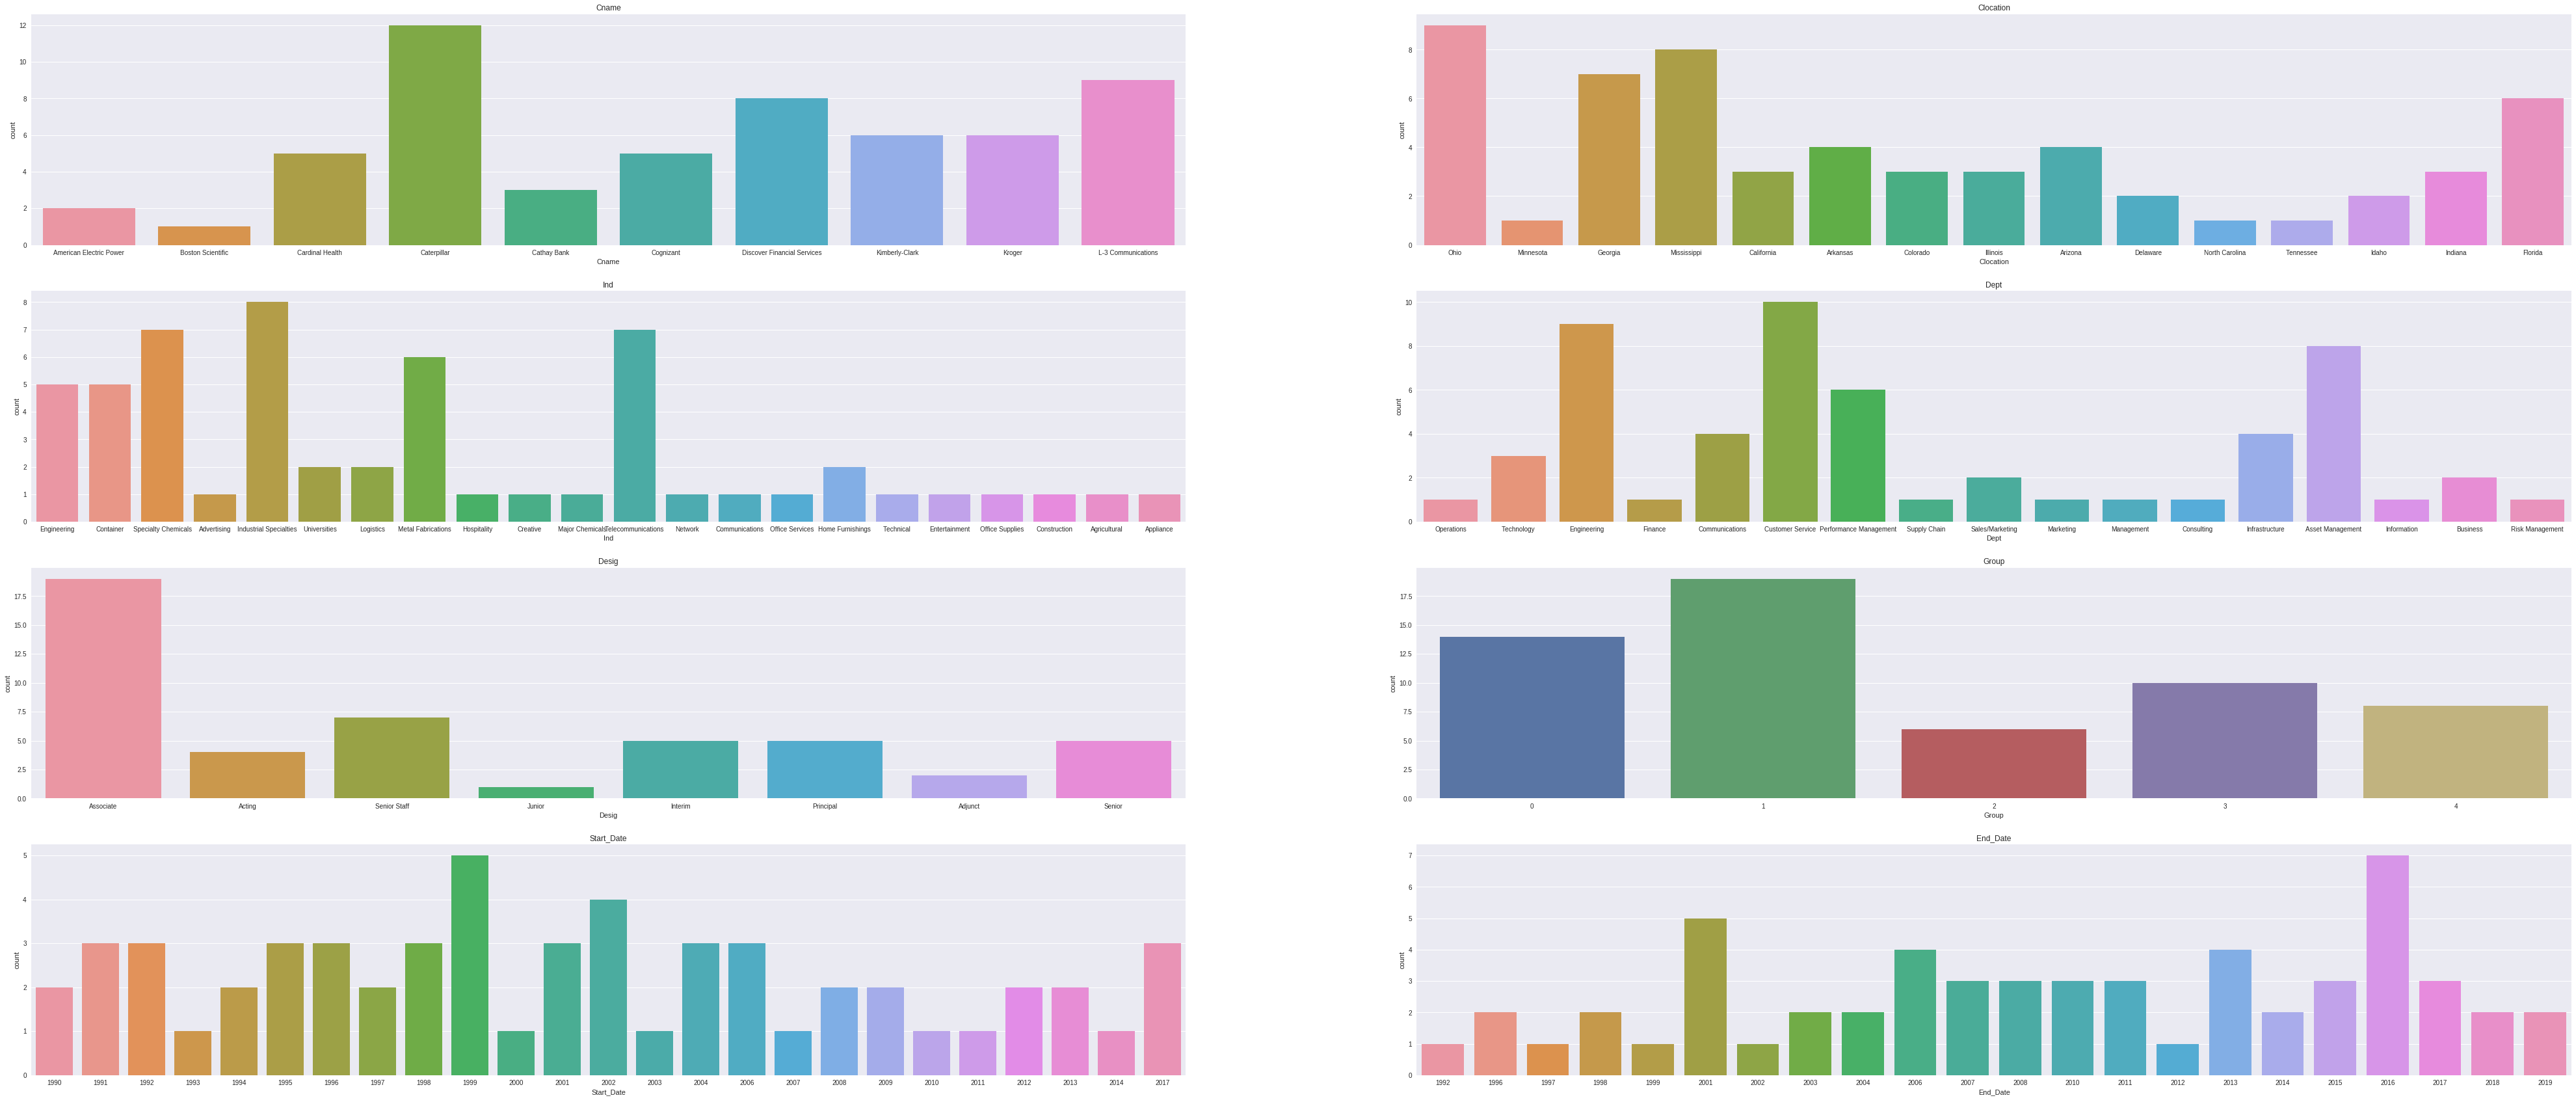

In [16]:
count=0
fig, axs = plt.subplots(ncols=2,nrows=4,figsize=(70,30))
                                            
for i in range(0,4):
    for j in range(0,2):
        
            axs[i,j].set_title(name[count])
            sns.countplot(x=df1[name[count]],ax=axs[i,j])

            count=count+1

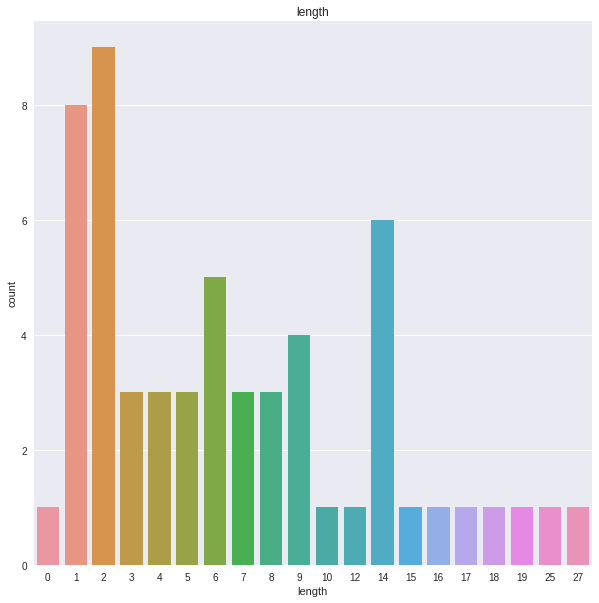

In [17]:

fig, axs = plt.subplots(figsize=(10,10),ncols=1)
                
        
axs.set_title('length')
sns.countplot(x=dftest2['length'],ax=axs)


# More Descriptive Statistics

In [51]:
print 'Cname'

for i in range(0,len(Cname)) :
  a=dftest2.loc[df1['Cname'] == Cname[i]]
  #print a
  #print type(a)
  print " "
  print "name:"+ str(Cname[i])
  print "min:"+ str(a.length.min())
  print "mean:"+ str(a.length.mean())
  print "median:"+ str(a.length.median())
  print "max:"+ str(a.length.max())
  
  print "std:"+ str(a.length.std())
  

Cname
 
name:American Electric Power
min:1
mean:1.5
median:1.5
max:2
std:0.7071067811865476
 
name:Boston Scientific
min:2
mean:2.0
median:2.0
max:2
std:nan
 
name:Cardinal Health
min:4
mean:7.0
median:6.0
max:14
std:4.123105625617661
 
name:Caterpillar
min:1
mean:8.0
median:6.5
max:18
std:5.9696200579570915
 
name:Cathay Bank
min:1
mean:3.0
median:2.0
max:6
std:2.6457513110645907
 
name:Cognizant
min:1
mean:4.6
median:3.0
max:9
std:4.09878030638384
 
name:Discover Financial Services
min:1
mean:8.875
median:9.5
max:19
std:6.957780844904091
 
name:Kimberly-Clark
min:2
mean:7.833333333333333
median:6.5
max:16
std:6.013872850889571
 
name:Kroger
min:2
mean:13.5
median:11.0
max:27
std:10.483320084782301
 
name:L-3 Communications
min:0
mean:5.444444444444445
median:5.0
max:14
std:4.216370213557839


The company with the max length is Kroger, while the company with the highest mean length is also Kroger.

In [50]:
print "Clocation"
for i in range(0,len(Clocation)) :
  a=dftest2.loc[df1['Clocation'] == Clocation[i]]
  #print a
  #print type(a)
  print " "
  print "name:"+ str(Clocation[i])
  print "min:"+ str(a.length.min())
  print "mean:"+ str(a.length.mean())
  print "median:"+ str(a.length.median())
  print "max:"+ str(a.length.max())
  
  print "std:"+ str(a.length.std())
  

Clocation
 
name:Ohio
min:1
mean:5.888888888888889
median:4.0
max:14
std:5.035981643246042
 
name:Minnesota
min:2
mean:2.0
median:2.0
max:2
std:nan
 
name:Georgia
min:1
mean:10.571428571428571
median:12.0
max:18
std:5.652643713553946
 
name:Mississippi
min:2
mean:6.375
median:6.0
max:17
std:4.627171304989074
 
name:California
min:1
mean:3.0
median:2.0
max:6
std:2.6457513110645907
 
name:Arkansas
min:1
mean:6.0
median:3.5
max:16
std:6.879922480183431
 
name:Colorado
min:1
mean:4.333333333333333
median:3.0
max:9
std:4.163331998932266
 
name:Illinois
min:2
mean:10.0
median:9.0
max:19
std:8.54400374531753
 
name:Arizona
min:1
mean:10.0
median:12.0
max:15
std:6.377042156569663
 
name:Delaware
min:1
mean:5.0
median:5.0
max:9
std:5.656854249492381
 
name:North Carolina
min:2
mean:2.0
median:2.0
max:2
std:nan
 
name:Tennessee
min:8
mean:8.0
median:8.0
max:8
std:nan
 
name:Idaho
min:5
mean:15.0
median:15.0
max:25
std:14.142135623730951
 
name:Indiana
min:2
mean:12.333333333333334
median:8.0
max

The state with the maximum length is Indiana, while Idaho has the highest mean length.

In [49]:
print "Ind"
for i in range(0,len(Ind)) :
  a=dftest2.loc[df1['Ind'] == Ind[i]]
  #print a
  #print type(a)
  print " "
  print "name:"+ str(Ind[i])
  print "min:"+ str(a.length.min())
  print "mean:"+ str(a.length.mean())
  print "median:"+ str(a.length.median())
  print "max:"+ str(a.length.max())
  
  print "std:"+ str(a.length.std())
  

Ind
 
name:Engineering
min:2
mean:7.4
median:5.0
max:14
std:6.148170459575759
 
name:Container
min:1
mean:5.2
median:5.0
max:14
std:5.310367218940701
 
name:Specialty Chemicals
min:1
mean:4.285714285714286
median:4.0
max:8
std:2.7516228977511745
 
name:Advertising
min:4
mean:4.0
median:4.0
max:4
std:nan
 
name:Industrial Specialties
min:2
mean:8.75
median:8.5
max:14
std:4.026696625558687
 
name:Universities
min:2
mean:3.0
median:3.0
max:4
std:1.4142135623730951
 
name:Logistics
min:6
mean:12.0
median:12.0
max:18
std:8.48528137423857
 
name:Metal Fabrications
min:1
mean:8.5
median:5.5
max:25
std:9.22496612459905
 
name:Hospitality
min:17
mean:17.0
median:17.0
max:17
std:nan
 
name:Creative
min:1
mean:1.0
median:1.0
max:1
std:nan
 
name:Major Chemicals
min:6
mean:6.0
median:6.0
max:6
std:nan
 
name:Telecommunications
min:0
mean:3.7142857142857144
median:3.0
max:8
std:3.251373336211726
 
name:Network
min:9
mean:9.0
median:9.0
max:9
std:nan
 
name:Communications
min:1
mean:1.0
median:1.0
m

Here, the industry with the max value is Hospitality.

In [48]:
print "Dept"
for i in range(0,len(Dept)) :
  a=dftest2.loc[df1['Dept'] == Dept[i]]
  #print a
  #print type(a)
  print " "
  print "name:"+ str(Dept[i])
  print "min:"+ str(a.length.min())
  print "mean:"+ str(a.length.mean())
  print "median:"+ str(a.length.median())
  print "max:"+ str(a.length.max())
  print "Desig"
  
  print "std:"+ str(a.length.std())
  
  
  

Dept
 
name:Operations
min:2
mean:2.0
median:2.0
max:2
Desig
std:nan
 
name:Technology
min:1
mean:4.666666666666667
median:6.0
max:7
Desig
std:3.214550253664318
 
name:nan
min:nan
mean:nan
median:nan
max:nan
Desig
std:nan
 
name:Engineering
min:2
mean:7.444444444444445
median:5.0
max:16
Desig
std:5.592653911854173
 
name:Finance
min:4
mean:4.0
median:4.0
max:4
Desig
std:nan
 
name:Communications
min:0
mean:7.75
median:6.5
max:18
Desig
std:8.73212459828649
 
name:Customer Service
min:1
mean:7.5
median:8.5
max:15
Desig
std:5.01663898109747
 
name:Performance Management
min:1
mean:11.5
median:10.5
max:27
Desig
std:9.093954035511725
 
name:Supply Chain
min:17
mean:17.0
median:17.0
max:17
Desig
std:nan
 
name:Sales/Marketing
min:1
mean:4.5
median:4.5
max:8
Desig
std:4.949747468305833
 
name:Marketing
min:2
mean:2.0
median:2.0
max:2
Desig
std:nan
 
name:Management
min:6
mean:6.0
median:6.0
max:6
Desig
std:nan
 
name:Consulting
min:1
mean:1.0
median:1.0
max:1
Desig
std:nan
 
name:Infrastructu

Max length  and the highest mean length is the supply change industry.

In [47]:
print "Desig"
for i in range(0,len(Desig)) :
  a=dftest2.loc[df1['Desig'] == Desig[i]]
  #print a
  #print type(a)
  print " "
  print "name:"+ str(Desig[i])
  
  print "min:"+ str(a.length.min())
  print "mean:"+ str(a.length.mean())
  print "median:"+ str(a.length.median())
  print "max:"+ str(a.length.max())
  
  print "std:"+ str(a.length.std())
  
  

Desig
 
name:Associate
min:1
mean:6.7894736842105265
median:5.0
max:25
std:6.587690097349255
 
name:Acting
min:1
mean:6.5
median:5.5
max:14
std:5.802298395176403
 
name:Senior Staff
min:1
mean:4.857142857142857
median:4.0
max:14
std:4.4131837120372035
 
name:Junior
min:14
mean:14.0
median:14.0
max:14
std:nan
 
name:Interim
min:2
mean:7.6
median:6.0
max:19
std:6.6558245169174945
 
name:nan
min:nan
mean:nan
median:nan
max:nan
std:nan
 
name:Principal
min:0
mean:4.4
median:3.0
max:9
std:3.9115214431215892
 
name:Adjunct
min:1
mean:3.5
median:3.5
max:6
std:3.5355339059327378
 
name:Senior
min:1
mean:6.0
median:2.0
max:16
std:6.442049363362563


For the Designation category, the max length is with associates, but the highest average is with interim.

# **Association Measure Heatmaps(Using Cramer V and Theil U)**


Pearson's correlation is not meant for categorical variables, so I have used Cramer V's and Theil U as replacements

In [0]:

def cramers_v(confusion_matrix):
    #confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [0]:


def theils_u(x, y):
    s_xy = drv.entropy_conditional(x, y)
    #print s_xy
    x_counter = collections.Counter(x)
    total_occurrences = float(sum(x_counter.values()))
   
    #print x_counter.values()
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    #print p_x
    #print s_x
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

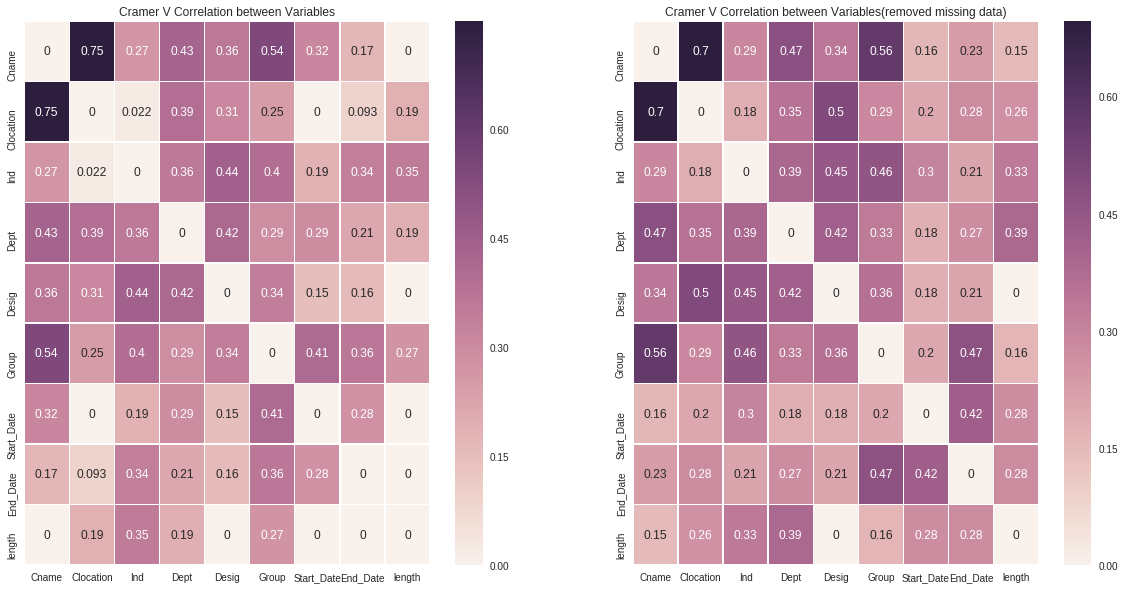

In [34]:

cols = list(name2)
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(dftest2[col1], dftest2[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr1 = pd.DataFrame(corrM, index=cols, columns=cols)

cols=list(name2)
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(dftest3[col1], dftest3[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]


corr2 = pd.DataFrame(corrM, index=cols, columns=cols)


fig, ax = plt.subplots(figsize=(20, 10),ncols=2)
sns.heatmap(corr1, annot=True, ax=ax[0],linewidths=.5); ax[0].set_title("Cramer V Correlation between Variables");

sns.heatmap(corr2, annot=True, ax=ax[1],linewidths=.5); ax[1].set_title("Cramer V Correlation between Variables(removed missing data)");
         
  


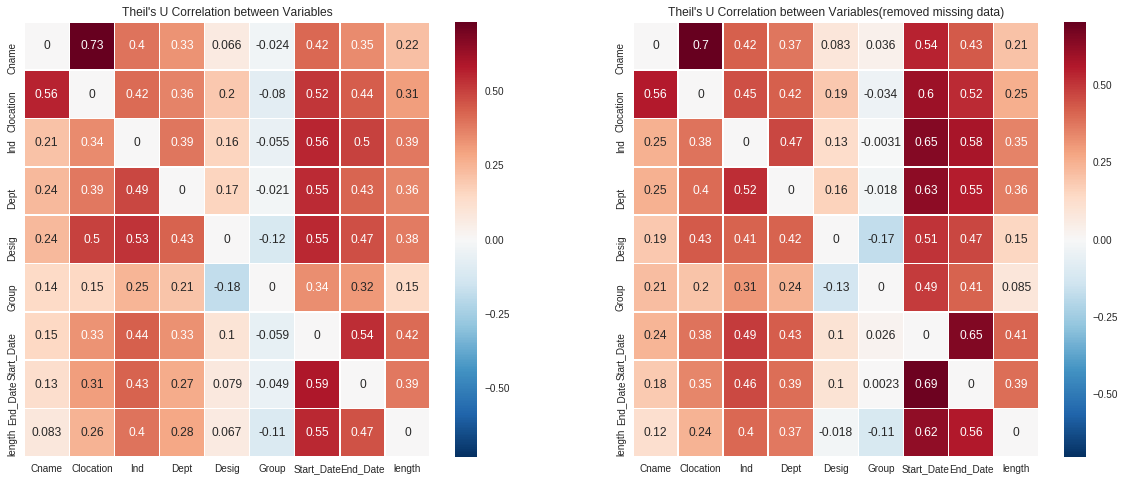

In [38]:


corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = theils_u(dftest2[col1], dftest2[col2])
    corrM[idx2, idx1] = theils_u( dftest2[col2],dftest2[col1])

    

corr1 = pd.DataFrame(corrM, index=cols, columns=cols)


corrM = np.zeros((len(cols),len(cols)))
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = theils_u(dftest3[col1], dftest3[col2])
    corrM[idx2, idx1] = theils_u( dftest3[col2],dftest3[col1])


corr2 = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(20,8),ncols=2)
sns.heatmap(corr1, annot=True, ax=ax[0],linewidths=.5); ax[0].set_title("Theil's U Correlation between Variables");

sns.heatmap(corr2, annot=True, ax=ax[1],linewidths=.5); ax[1].set_title("Theil's U Correlation between Variables(removed missing data)");


Overall there is a high association(under both Cramer V and Theil's U) between Cname and Clocation; this is because the company is often at one location.
The length of time the customer has used the product has the highest Cramer V with the industry; the value is 0.35. If you remove the missing data, the Cramer V between the length and the industry is the highest with the value of .39.
Under the Theil's U measure,the length gives a good idea of the start date and length,though the vice versa is weaker.


# **Principal Component Analysis**

In [0]:
df3=pd.get_dummies(df1,prefix=['Cname','Clocation','Ind','Dept','Desig'])
#print df3

In [0]:

pca = decomposition.PCA(n_components=4, whiten=True)

pcadata = pca.fit_transform(df3)



In [41]:
pca.explained_variance_


array([87.79867965, 19.79066354,  1.97861873,  0.42057329])

In [42]:
pca.explained_variance_ratio_

array([0.77279727, 0.17419591, 0.01741565, 0.00370185])

So there are 2 underlying principal components that hold most of the variance. This could be useful for supervised learning purposes.